In [1]:
if false
    import Pkg
    Pkg.add("JuMP")
    Pkg.add("GLPK")
    Pkg.add("Plots")
end

In [2]:
using JuMP
using GLPK
using Plots

In [3]:
function ejemplo0(n::Int = 10)
    xy = rand(n, 2) * 1_000.0
    dist = [sqrt((xy[i, 1] - xy[j, 1])^2 + (xy[i, 2] - xy[j, 2])^2) for i in 1:n, j in 1:n]

    m = JuMP.Model()
    @variable(m, x[1:n, 1:n], Bin)
    @variable(m, u[1:n] >= 0)
    @objective(m, Min, sum(dist .* x))
    @constraint(m, r0[i in 1:n], x[i, i] == 0)
    @constraint(m, r1[i in 1:n], sum(x[i, :]) == 1)
    @constraint(m, r2[j in 1:n], sum(x[:, j]) == 1)
    @constraint(m, r3[i in 1:n, j in 2:n], u[i] + 1 <= u[j] + n * (1 - x[i, j]))

    JuMP.set_optimizer(m, GLPK.Optimizer)
    JuMP.optimize!(m)

    tour = Int[1]
    xval = JuMP.value.(x)
    while true
        push!(tour, argmax(xval[tour[end], :]))
        if tour[end] == 1 break end
    end

    println("Termination Status: ", JuMP.termination_status(m))
    println("Objetive Value: ", JuMP.objective_value(m))
    println("Objetive Bound: ", JuMP.objective_bound(m))
    println("GAP: ", JuMP.relative_gap(m))
    println("Solve Time: ", JuMP.solve_time(m))
    println("Tour: ", tour)

    p = plot(legend=false)
    scatter!(xy[:,1], xy[:,2], color=:blue)
    plot!(xy[tour,1] , xy[tour,2] , color=:black)

    return p
end

ejemplo0 (generic function with 2 methods)

Termination Status: OPTIMAL
Objetive Value: 2892.802488759252
Objetive Bound: 2892.802488759252
GAP: 0.0026880647193520016
Solve Time: 0.014925956726074219
Tour: [1, 7, 8, 2, 3, 9, 10, 6, 4, 5, 1]


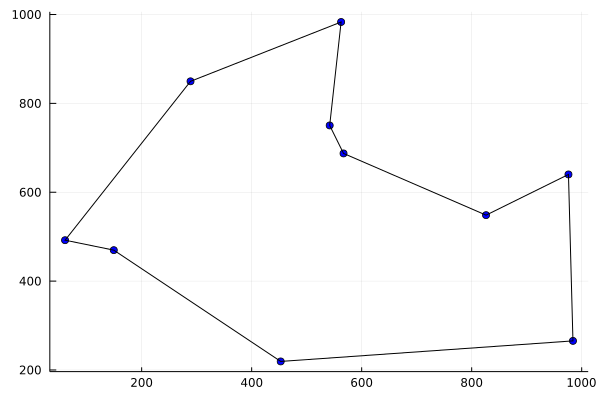

In [4]:
ejemplo0()